The code in `pyldl.applications.lesion_counting` is basically an unofficial implementation of the paper "Joint Acne Image Grading and Counting via Label Distribution Learning" (*ICCV* 2019).

In [1]:
import numpy as np
import pyldl.applications.lesion_counting as lc

In [2]:
from pyldl.utils import LDLEarlyStopping

In [3]:
import keras

In [4]:
X, _, counts = lc.load_acne04('./ACNE04')

In [5]:
y = lc.preprocessing(counts, sigma=3.)

In [6]:
val = int(X.shape[0] * 0.9)

In [7]:
model = lc.LDL_ACNE()

In [8]:
model.fit(X[:val], y[:val], verbose=1,
          batch_size=64, optimizer=keras.optimizers.SGD(5e-5),
          X_val=X[val:], y_val=y[val:], callbacks=[LDLEarlyStopping(monitor='mean_absolute_error', patience=200)])

I0000 00:00:1717592080.575889  158644 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1000/1000 [==============================] - 2801s 3s/step - loss: 1136.8025 - mean_absolute_error: 26.6020


In [9]:
X_test, grades_test, counts_test = lc.load_acne04('./ACNE04', mode='test')

In [10]:
counts_test = lc.preprocessing(counts_test)

In [11]:
counts_pred, grades_pred = model.predict(X_test, return_grades=True)

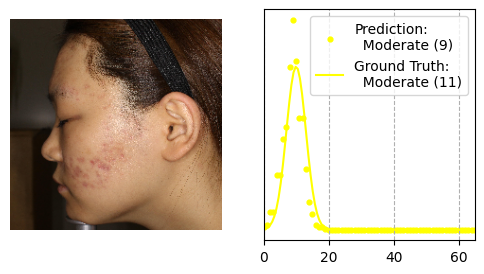

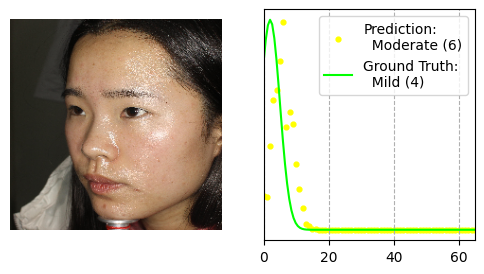

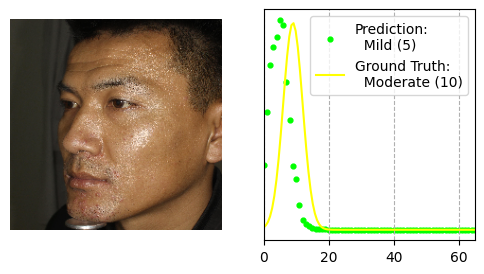

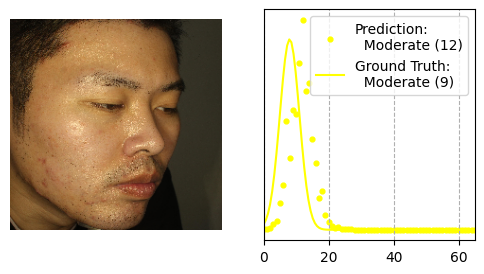

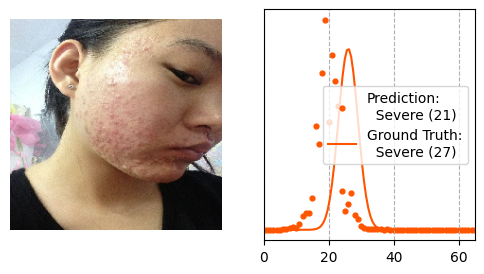

In [12]:
np.random.seed(0)
display = np.random.choice(X_test.shape[0], 5)
for i in display:
    lc.visualization(X_test[i], grades_pred[i], counts_pred[i],
                     grade_real=grades_test[i], count_real=counts_test[i])